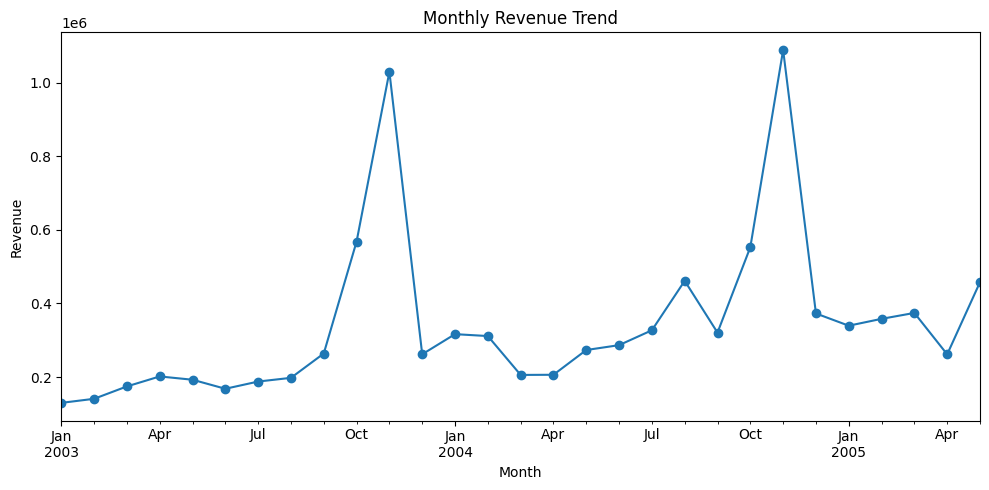

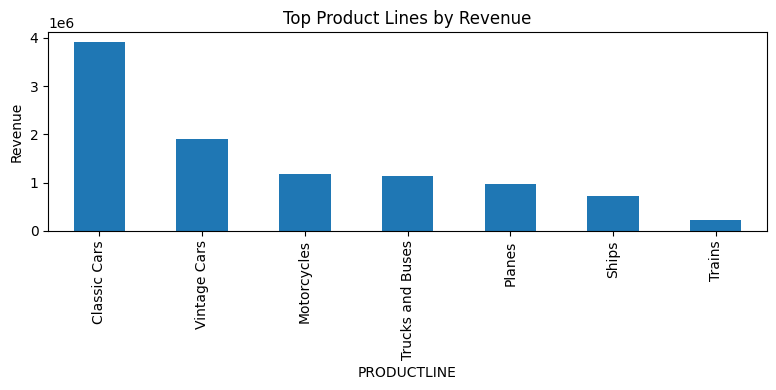

COUNTRY
USA          3627982.83
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Italy         374674.31
Finland       329581.91
Norway        307463.70
Singapore     288488.41
Denmark       245637.15
Name: SALES, dtype: float64

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("sales_data_sample.csv", encoding='latin1')

# Basic cleaning
df.columns = df.columns.str.strip()
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df['MONTH'] = df['ORDERDATE'].dt.to_period('M')

# Check nulls
df.isna().sum()

# Revenue by month
monthly_sales = df.groupby('MONTH')['SALES'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.tight_layout()
plt.savefig("revenue_trend.png")
plt.show()

# Top 10 products
top_products = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
top_products.plot(kind='bar')
plt.title("Top Product Lines by Revenue")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("top_products.png")
plt.show()

# Country-wise revenue
country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)
country_sales
